# Fraud Detection

## Finding the People of Interest and Indicative Email Language

### The Enron Corporation
![Enron logo1](images/Enron%20logo1.png)


The Enron Corporation was an American energy company based in Houston, Texas formed in 1985 by Kenneth Lay after merging Houston Natural Gas and InterNorth.  The Enron scandal, initially made public in the fall of 2001, eventually led to the bankruptcy of the Enron Corporation.  The case led not only to the dissolution of Enron, but also the de facto dissolution of Arthur Andersen, one of the five largest accountancy firms in the world at the time.  Additionally, the case caused financial distress thoughtout the energy, trading and financial markets, ultimately leading to the implementation of the Sarbanes-Oxley Act in the US.   In 2001, it was the largest bankruptcy reorganization in American history, though that title was shortlived, with the collapse of Worldcom the following year. Nearly twenty years later the effects of the collapse are still felt in the financial and energy markets.  Given the enormous scope of the corporate failure in risk mangement, auditor oversight, and corporate culture, the red flags that were visible are worth ongoing investigation.


### The Enron Emails

The dataset we are reviewing is the remaining body of corporate emails mostly between 1997-2001.  The remaining body contains data from about 150 users, mostly senior management of Enron, and contains over 500k individual emails.  This data was originally made public,  by the Federal Energy Regulatory Commission during its investigation. You can find the source data here.  It was not included in the repository due to its size.
https://www.cs.cmu.edu/~enron/


### The Question

We will be using both the email metadata and the emails themselves to indentify the people of interest (POI) requiring further investigation.  The process will focus on a two step analysis wherein we will use the ouput of an unsupervised algorithm as the input for a supervised learning algorithm.  __Can we train a model to flag someone as being at risk of committing fraud using their email traffic?__  The project is orangized into 5 notebooks and the reader is requested to review them in order for maximum clarity into the process.  

### Essentially, we will follow the OSEMN process:
 - Obtaining the dataset and loading it into our notebook in part 1
 - Scrubbing the data, text in emails is particularly messy and you will see this done throughout the project though it is focused in part 1 and part 2
 - Exploring the data set suring part 2 and part 3 (and some in part 4) using some traditional methods as well as newer ones, such as word clouds
 - The process is iterative and additional cleaning and exploring will be done in part 4 as prep for our models
 - Modeling with both Unsupervised Machine Learning followed by Modeling with supervised machine learning in part 4
 - Finally, we will interpret our results of the models in part 4 and make recomendations for use cases.

As always we will begin the process by importing the libraries we will need in the first section of the project related to loading the data and cleaning the data.  

In [66]:
import pandas as pd
import numpy as np
import string
from operator import itemgetter
from datetime import datetime
import networkx as nx
import nxviz as nv
import re
import os
from email.parser import Parser
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [67]:
#Begining the investigation and navigating to the folder where these files are being stored.
employee_email_dir = os.listdir('maildir/')
print("There are {} employee addresses whose emails are included in this analysis".format(len(employee_email_dir)))

There are 152 employee addresses whose emails are included in this analysis


The first thing we can do is to start looking into Kenneth Lay's folders, the CEO who was sentenced to prison time, but died prior to being able to fullfill sentence.

In [68]:
#finding all the subfolders in Lay's folder - note he has two email addressess
rootdir = "maildir/lay-k/"

for directory, subdirectory, filenames in  os.walk(rootdir):
    print(directory, subdirectory, len(filenames))

maildir/lay-k/ ['notes_inbox', 'deleted_items', 'calendar', 'inbox', 'discussion_threads', 'sec_panel', 'business', 'family', 'sent_items', '_sent', 'sent', 'compaq', 'elizabeth', 'all_documents', 'enron'] 1
maildir/lay-k/notes_inbox [] 799
maildir/lay-k/deleted_items [] 1126
maildir/lay-k/calendar [] 8
maildir/lay-k/inbox [] 1372
maildir/lay-k/discussion_threads [] 910
maildir/lay-k/sec_panel [] 3
maildir/lay-k/business [] 2
maildir/lay-k/family [] 8
maildir/lay-k/sent_items [] 13
maildir/lay-k/_sent [] 261
maildir/lay-k/sent [] 266
maildir/lay-k/compaq [] 1
maildir/lay-k/elizabeth [] 35
maildir/lay-k/all_documents [] 1127
maildir/lay-k/enron [] 5


That is almost 6,000 emails, just for Lay.  We can now do the same thing for the whole dataset and ensure we have captured all the emails we are expecting.

In [69]:
root = "maildir/"
for directory, subdirectory, filenames in  os.walk(root):
    print(directory, subdirectory, len(filenames))

maildir/ ['arnold-j', 'phanis-s', 'lavorato-j', 'stclair-c', 'townsend-j', 'forney-j', 'symes-k', 'reitmeyer-j', 'hyatt-k', 'steffes-j', 'kaminski-v', 'wolfe-j', 'mcconnell-m', 'skilling-j', 'zipper-a', 'shively-h', 'donoho-l', 'sanchez-m', 'delainey-d', 'germany-c', 'whalley-l', 'buy-r', 'harris-s', 'tholt-j', 'cash-m', 'sanders-r', 'staab-t', 'semperger-c', 'mccarty-d', 'mclaughlin-e', 'ring-a', 'stokley-c', 'hain-m', 'weldon-c', 'ring-r', 'farmer-d', 'sager-e', 'zufferli-j', 'ybarbo-p', 'watson-k', 'dasovich-j', 'arora-h', 'slinger-r', 'martin-t', 'storey-g', 'ruscitti-k', 'shankman-j', 'schwieger-j', 'perlingiere-d', 'saibi-e', 'griffith-j', 'meyers-a', 'grigsby-m', 'taylor-m', 'rapp-b', 'causholli-m', 'derrick-j', 'bass-e', 'south-s', 'salisbury-h', 'beck-s', 'tycholiz-b', 'shackleton-s', 'kitchen-l', 'merriss-s', 'blair-l', 'quenet-j', 'lokey-t', 'williams-j', 'panus-s', 'gang-l', 'hendrickson-s', 'schoolcraft-d', 'mann-k', 'kuykendall-t', 'allen-p', 'giron-d', 'lewis-a', 'jones-

maildir/symes-k/deal_communication/deal_discrepancies [] 897
maildir/symes-k/deal_communication/dow_jones [] 37
maildir/symes-k/deal_communication/cal_px [] 8
maildir/symes-k/deal_communication/ees [] 28
maildir/symes-k/all_documents [] 3221
maildir/symes-k/services [] 1
maildir/symes-k/pending [] 4
maildir/reitmeyer-j ['deleted_items', 'inbox', 'sent_items', 'jay_s_saved_stuff'] 0
maildir/reitmeyer-j/deleted_items [] 88
maildir/reitmeyer-j/inbox [] 352
maildir/reitmeyer-j/sent_items [] 57
maildir/reitmeyer-j/jay_s_saved_stuff [] 1
maildir/hyatt-k ['personal', 'to_do', 'deleted_items', 'tasks', 'inbox', 'power_conf', 'training', 'projects', 'contacts', 'sent_items', 'tw', 'corp_memos', 'enron_kids', 'market_intel'] 0
maildir/hyatt-k/personal ['cars', 'travel', 'pswds'] 166
maildir/hyatt-k/personal/cars [] 10
maildir/hyatt-k/personal/travel [] 3
maildir/hyatt-k/personal/pswds [] 9
maildir/hyatt-k/to_do [] 64
maildir/hyatt-k/deleted_items ['so_trails', 'atoka_lateral'] 647
maildir/hyatt-

maildir/wolfe-j/deleted_items [] 108
maildir/wolfe-j/tasks [] 1
maildir/wolfe-j/calendar [] 6
maildir/wolfe-j/inbox [] 348
maildir/wolfe-j/05_saved [] 64
maildir/wolfe-j/discussion_threads [] 196
maildir/wolfe-j/07_saved [] 98
maildir/wolfe-j/sent_items [] 93
maildir/wolfe-j/06_saved [] 113
maildir/wolfe-j/saved_04 [] 66
maildir/wolfe-j/saved_03 [] 48
maildir/wolfe-j/saved_02 [] 33
maildir/wolfe-j/saved_12 [] 16
maildir/wolfe-j/08_saved [] 34
maildir/wolfe-j/09_saved [] 42
maildir/wolfe-j/10_saved [] 89
maildir/wolfe-j/all_documents [] 197
maildir/wolfe-j/saved_01 [] 32
maildir/mcconnell-m ['puerto_rico', 'notes_inbox', 'enhome', 'crude_and_products', 'misc', 'personal', 'vision___values', 'to_do', 'tw_accounts', 'deleted_items', 'tasks', 'metals', 'calendar', 'inbox', 'discussion_threads', 'garcia_munte', 'art_committee', 'project_grandslam', 'org__announc_', 'middle_east', 'enroncredit_com', 'art', 'gaza', 'lng', 'contacts', 'articles', 'sent_items', 'insurance_risk', 'var', 'project

maildir/germany-c/all_documents [] 3027
maildir/germany-c/vng [] 20
maildir/germany-c/pending [] 5
maildir/whalley-l ['notes_inbox', 'tasks', 'ecommerce', 'discussion_threads', 'contacts', 'sent', '_sent_mail', 'connect_deletes', 'all_documents'] 0
maildir/whalley-l/notes_inbox [] 650
maildir/whalley-l/tasks [] 3
maildir/whalley-l/ecommerce [] 7
maildir/whalley-l/discussion_threads [] 961
maildir/whalley-l/contacts [] 7
maildir/whalley-l/sent [] 233
maildir/whalley-l/_sent_mail [] 219
maildir/whalley-l/connect_deletes [] 172
maildir/whalley-l/all_documents [] 1083
maildir/buy-r ['notes_inbox', 'personal', 'to_do', 'deleted_items', 'tasks', 'helsinki', 'calendar', 'inbox', 'discussion_threads', 'contacts', 'sent_items', 'sent', '_sent_mail', 'connect_deletes', 'all_documents'] 0
maildir/buy-r/notes_inbox [] 29
maildir/buy-r/personal ['home_buy'] 0
maildir/buy-r/personal/home_buy [] 1
maildir/buy-r/to_do [] 1
maildir/buy-r/deleted_items [] 110
maildir/buy-r/tasks [] 1
maildir/buy-r/helsi

maildir/weldon-c/discussion_threads [] 199
maildir/weldon-c/ft__pierce [] 64
maildir/weldon-c/abraxas [] 2
maildir/weldon-c/lng [] 2
maildir/weldon-c/training [] 7
maildir/weldon-c/unocal [] 2
maildir/weldon-c/southern_lng [] 6
maildir/weldon-c/contacts [] 1
maildir/weldon-c/it [] 10
maildir/weldon-c/austin_energy [] 3
maildir/weldon-c/ed [] 2
maildir/weldon-c/sent_items [] 190
maildir/weldon-c/kcs [] 25
maildir/weldon-c/eol [] 6
maildir/weldon-c/sent [] 184
maildir/weldon-c/citibank [] 9
maildir/weldon-c/misc__gas_issues [] 11
maildir/weldon-c/rotation_1 ['water', 'ja', 'hurricane'] 0
maildir/weldon-c/rotation_1/water ['ag_model'] 0
maildir/weldon-c/rotation_1/water/ag_model [] 3
maildir/weldon-c/rotation_1/ja [] 1
maildir/weldon-c/rotation_1/hurricane [] 4
maildir/weldon-c/ut_mba [] 15
maildir/weldon-c/misc_ [] 43
maildir/weldon-c/_sent_mail [] 82
maildir/weldon-c/private_folders ['associate'] 0
maildir/weldon-c/private_folders/associate [] 5
maildir/weldon-c/stagecoach [] 13
maildir

maildir/dasovich-j/notes_inbox [] 7194
maildir/dasovich-j/risk_analytics [] 3
maildir/dasovich-j/personal [] 52
maildir/dasovich-j/gas_accord [] 1
maildir/dasovich-j/boomerang [] 2
maildir/dasovich-j/commercial_opportunities_task_force [] 4
maildir/dasovich-j/to_do [] 3
maildir/dasovich-j/mba__finance_study_group [] 2
maildir/dasovich-j/deleted_items [] 1564
maildir/dasovich-j/mba_program [] 71
maildir/dasovich-j/cross_border_task_force [] 6
maildir/dasovich-j/mba__quant [] 28
maildir/dasovich-j/calendar [] 5
maildir/dasovich-j/inbox ['direct_access_battle'] 1387
maildir/dasovich-j/inbox/direct_access_battle [] 6
maildir/dasovich-j/mba__finance [] 9
maildir/dasovich-j/mba__macroeconomics [] 51
maildir/dasovich-j/water [] 1
maildir/dasovich-j/roseman_creek [] 1
maildir/dasovich-j/mba__advanced_finance [] 9
maildir/dasovich-j/pg_e_pbr [] 2
maildir/dasovich-j/california_crisis__press [] 46
maildir/dasovich-j/sent_items [] 1436
maildir/dasovich-j/speeches [] 1
maildir/dasovich-j/eci [] 140

maildir/griffith-j/market [] 223
maildir/griffith-j/cqg [] 3
maildir/griffith-j/benefits [] 5
maildir/griffith-j/continental [] 17
maildir/griffith-j/vpp ['brazos_lp'] 12
maildir/griffith-j/vpp/brazos_lp [] 21
maildir/griffith-j/trading [] 2
maildir/griffith-j/all_documents [] 565
maildir/griffith-j/ees [] 1
maildir/griffith-j/newpower [] 2
maildir/griffith-j/ace [] 3
maildir/griffith-j/chase_mah_stone [] 24
maildir/griffith-j/dsc [] 1
maildir/meyers-a ['deleted_items', 'inbox', 'sent_items'] 0
maildir/meyers-a/deleted_items [] 1066
maildir/meyers-a/inbox [] 22
maildir/meyers-a/sent_items [] 11
maildir/grigsby-m ['notes_inbox', 'deleted_items', 'inbox', 'discussion_threads', 'contacts', 'sent_items', 'sent', '_sent_mail', 'all_documents'] 0
maildir/grigsby-m/notes_inbox [] 164
maildir/grigsby-m/deleted_items [] 352
maildir/grigsby-m/inbox [] 77
maildir/grigsby-m/discussion_threads [] 333
maildir/grigsby-m/contacts [] 3
maildir/grigsby-m/sent_items [] 292
maildir/grigsby-m/sent [] 283
m

maildir/beck-s/piper__greg [] 11
maildir/beck-s/deleted_items [] 309
maildir/beck-s/causey__rick [] 23
maildir/beck-s/personnel_issues [] 13
maildir/beck-s/ernie_training [] 13
maildir/beck-s/hedstrom__peggy [] 14
maildir/beck-s/hopwood__tom [] 7
maildir/beck-s/calendar [] 126
maildir/beck-s/mpr [] 4
maildir/beck-s/leadership_development [] 3
maildir/beck-s/inbox ['ncl'] 751
maildir/beck-s/inbox/ncl [] 1
maildir/beck-s/office_of_the_chair [] 8
maildir/beck-s/sap [] 39
maildir/beck-s/discussion_threads [] 2630
maildir/beck-s/unify [] 21
maildir/beck-s/apollo__beth [] 19
maildir/beck-s/ase [] 15
maildir/beck-s/prudency [] 4
maildir/beck-s/gossett__jeff [] 16
maildir/beck-s/perez__eugenio [] 12
maildir/beck-s/mg [] 55
maildir/beck-s/pulp_paper_lumber [] 2
maildir/beck-s/shankman__jeff [] 6
maildir/beck-s/2001_plan [] 6
maildir/beck-s/steel [] 1
maildir/beck-s/reeves__leslie [] 2
maildir/beck-s/chicago [] 3
maildir/beck-s/lng [] 6
maildir/beck-s/cousino__lisa [] 11
maildir/beck-s/operating

maildir/shackleton-s/mexico [] 1
maildir/shackleton-s/restricted_list [] 12
maildir/shackleton-s/glover [] 74
maildir/shackleton-s/organizational_changes [] 51
maildir/shackleton-s/nymex [] 14
maildir/shackleton-s/duke [] 5
maildir/shackleton-s/confirms___london_paper___pulp [] 4
maildir/shackleton-s/brazil___weekly_reports [] 1
maildir/shackleton-s/philippines [] 2
maildir/shackleton-s/collateral_issues [] 2
maildir/shackleton-s/government_affairs [] 1
maildir/shackleton-s/meetings [] 14
maildir/shackleton-s/ct_corporation [] 1
maildir/shackleton-s/argentina_legal_report [] 13
maildir/shackleton-s/confirms___paper___pulp [] 26
maildir/shackleton-s/enron_networks [] 3
maildir/shackleton-s/laptop [] 2
maildir/shackleton-s/ernie [] 4
maildir/shackleton-s/computer [] 1
maildir/shackleton-s/parking [] 1
maildir/shackleton-s/brazil___derivatives [] 8
maildir/shackleton-s/all_documents [] 8158
maildir/shackleton-s/argentina_tax [] 1
maildir/shackleton-s/ees [] 2
maildir/shackleton-s/delmarva

maildir/mann-k ['notes_inbox', 'coral', 'asset_management_documents', 'yazoo_city', 'deleted_items', 'tasks', 'inbox', 'discussion_threads', 'ema_s', 'general_stuff', 'chicago', 'contacts', 'panda', 'off_balance_sheet_form_contracts', 'policy_manual_and_united_way', 'ge_general', 'sent_items', 'sent', 'nrg', 'power_purchase_eei', 'westinghouse', '_sent_mail', 'midway', 'florida', 'co_op_city', 'vepco', 'haywood', 'lm6000', 'new_jersey_natural', 'nimo', 'all_documents', 'enovate', 'blue_dog', 'fuel_cells'] 0
maildir/mann-k/notes_inbox [] 695
maildir/mann-k/coral [] 107
maildir/mann-k/asset_management_documents [] 3
maildir/mann-k/yazoo_city [] 186
maildir/mann-k/deleted_items [] 180
maildir/mann-k/tasks [] 2
maildir/mann-k/inbox [] 345
maildir/mann-k/discussion_threads [] 4965
maildir/mann-k/ema_s [] 5
maildir/mann-k/general_stuff [] 141
maildir/mann-k/chicago [] 87
maildir/mann-k/contacts [] 5
maildir/mann-k/panda [] 107
maildir/mann-k/off_balance_sheet_form_contracts [] 76
maildir/man

maildir/white-s/off_site [] 4
maildir/white-s/personal [] 21
maildir/white-s/south_america [] 13
maildir/white-s/deleted_items [] 989
maildir/white-s/tasks [] 3
maildir/white-s/genco_plant_misc [] 2
maildir/white-s/calendar [] 143
maildir/white-s/inbox [] 387
maildir/white-s/discussion_threads [] 169
maildir/white-s/portcalc_requests [] 1
maildir/white-s/cya [] 30
maildir/white-s/passwords [] 3
maildir/white-s/ena_cal [] 6
maildir/white-s/contacts [] 6
maildir/white-s/press [] 1
maildir/white-s/sent_items [] 445
maildir/white-s/sent [] 12
maildir/white-s/andersen_requests [] 18
maildir/white-s/flash ['200106'] 1
maildir/white-s/flash/200106 [] 6
maildir/white-s/doorstep [] 21
maildir/white-s/global_standards [] 12
maildir/white-s/meetings [] 738
maildir/white-s/west_var [] 1
maildir/white-s/legal [] 29
maildir/white-s/itinerary_receipt [] 8
maildir/white-s/all_documents [] 176
maildir/white-s/teco [] 4
maildir/white-s/personnel ['training', 'vacation'] 8
maildir/white-s/personnel/train

maildir/campbell-l/ngo_s [] 4
maildir/campbell-l/redrock_mainline_expansion [] 77
maildir/campbell-l/et_contacts [] 2
maildir/campbell-l/weekly_activity_report [] 15
maildir/campbell-l/et ['cge'] 4
maildir/campbell-l/et/cge [] 1
maildir/campbell-l/socal_pcb_s [] 9
maildir/campbell-l/sundevil_pipeline_project [] 7
maildir/campbell-l/g__robinson [] 8
maildir/campbell-l/all_documents [] 1708
maildir/campbell-l/gomez_remediation [] 9
maildir/campbell-l/ocd [] 1
maildir/campbell-l/lockridge_remediation [] 1
maildir/campbell-l/bloomfield_c_s [] 1
maildir/campbell-l/eott_midland [] 38
maildir/campbell-l/eott_due_diligence [] 2
maildir/richey-c ['personal', 'fundamentals', 'to_do', 'deleted_items', 'administrivia', 'calendar', 'inbox', 'houstonfundamentals', 'marks', 'contacts', 'r', 'sent_items', 'software', '_sent_mail', 'trading_quotes', 'infrastructure', 'data', 'hydro', 'alberta'] 1
maildir/richey-c/personal [] 39
maildir/richey-c/fundamentals [] 7
maildir/richey-c/to_do [] 1
maildir/rich

maildir/haedicke-m/calendar [] 41
maildir/haedicke-m/inbox ['ees_products', 'pg_eplanofreorg', 'msu', 'negctc', '360network'] 600
maildir/haedicke-m/inbox/ees_products ['directaccess'] 1
maildir/haedicke-m/inbox/ees_products/directaccess [] 2
maildir/haedicke-m/inbox/pg_eplanofreorg [] 1
maildir/haedicke-m/inbox/msu [] 1
maildir/haedicke-m/inbox/negctc [] 1
maildir/haedicke-m/inbox/360network [] 2
maildir/haedicke-m/sempre [] 1
maildir/haedicke-m/dabhol [] 11
maildir/haedicke-m/enron_net_works [] 1
maildir/haedicke-m/stanley [] 5
maildir/haedicke-m/tva [] 4
maildir/haedicke-m/bear [] 2
maildir/haedicke-m/art [] 1
maildir/haedicke-m/riskmemos [] 3
maildir/haedicke-m/mehpictures [] 4
maildir/haedicke-m/sent_items [] 116
maildir/haedicke-m/hpl [] 1
maildir/haedicke-m/powercontracts [] 1
maildir/haedicke-m/albertappas [] 2
maildir/haedicke-m/sent [] 988
maildir/haedicke-m/riskratings [] 2
maildir/haedicke-m/policies [] 2
maildir/haedicke-m/lexisid [] 2
maildir/haedicke-m/japan [] 1
maildir

maildir/linder-e/discussion_threads [] 923
maildir/linder-e/_sent_mail [] 6
maildir/linder-e/all_documents [] 941
maildir/.ipynb_checkpoints [] 0
maildir/heard-m ['deleted_items', 'inbox', 'sent_items', 'sent', 'brokerage_agreements', 'all_documents'] 0
maildir/heard-m/deleted_items [] 232
maildir/heard-m/inbox ['master_netting'] 317
maildir/heard-m/inbox/master_netting [] 243
maildir/heard-m/sent_items [] 784
maildir/heard-m/sent [] 2
maildir/heard-m/brokerage_agreements [] 43
maildir/heard-m/all_documents [] 2
maildir/hodge-j ['notes_inbox', 'deleted_items', 'calendar', 'inbox', 'discussion_threads', 'contacts', 'sent_items', 'sent', '_sent_mail', 'all_documents'] 0
maildir/hodge-j/notes_inbox [] 71
maildir/hodge-j/deleted_items [] 487
maildir/hodge-j/calendar [] 1
maildir/hodge-j/inbox [] 639
maildir/hodge-j/discussion_threads [] 87
maildir/hodge-j/contacts [] 2
maildir/hodge-j/sent_items [] 96
maildir/hodge-j/sent [] 36
maildir/hodge-j/_sent_mail [] 13
maildir/hodge-j/all_documents

maildir/platter-p/calendar [] 6
maildir/platter-p/inbox [] 393
maildir/platter-p/sent_items [] 107
maildir/keavey-p ['notes_inbox', 'deleted_items', 'inbox', 'discussion_threads', 'contacts', 'sent_items', 'sent', '_sent_mail', 'saved_mail', 'all_documents'] 0
maildir/keavey-p/notes_inbox [] 293
maildir/keavey-p/deleted_items [] 316
maildir/keavey-p/inbox [] 518
maildir/keavey-p/discussion_threads [] 424
maildir/keavey-p/contacts [] 7
maildir/keavey-p/sent_items [] 32
maildir/keavey-p/sent [] 67
maildir/keavey-p/_sent_mail [] 73
maildir/keavey-p/saved_mail [] 2
maildir/keavey-p/all_documents [] 445
maildir/cuilla-m ['notes_inbox', 'personal', 'deleted_items', 'inbox', 'discussion_threads', 'sent_items', 'sent', '_sent_mail', '10_fantasy', 'all_documents', '12_fantasy', 'bernhardt'] 0
maildir/cuilla-m/notes_inbox [] 29
maildir/cuilla-m/personal [] 15
maildir/cuilla-m/deleted_items [] 421
maildir/cuilla-m/inbox [] 71
maildir/cuilla-m/discussion_threads [] 123
maildir/cuilla-m/sent_items 

maildir/kean-s/prc [] 25
maildir/kean-s/advertising [] 12
maildir/kean-s/ljm [] 2
maildir/kean-s/rail [] 1
maildir/kean-s/california_campaign [] 19
maildir/kean-s/dod [] 2
maildir/kean-s/business_council [] 8
maildir/kean-s/texas [] 10
maildir/kean-s/mtbe [] 13
maildir/kean-s/caliornia___investigations [] 32
maildir/kean-s/environmental_issues [] 71
maildir/kean-s/heat_wave [] 244
maildir/kean-s/bush [] 15
maildir/kean-s/california___demand_buydown [] 1
maildir/kean-s/arena [] 5
maildir/kean-s/federal_emergency [] 1
maildir/kean-s/transition_guide [] 2
maildir/kean-s/resco [] 1
maildir/kean-s/disclosure_rules [] 1
maildir/kean-s/cost_controls [] 8
maildir/kean-s/cec_conference [] 4
maildir/kean-s/bush_transition [] 13
maildir/kean-s/california___emergency_authority [] 2
maildir/kean-s/hr_stats [] 9
maildir/kean-s/project_california [] 29
maildir/kean-s/pennsylvania [] 1
maildir/kean-s/government_affairs_group_reports [] 1
maildir/kean-s/market_structure [] 34
maildir/kean-s/uniform_bus

maildir/donohoe-t/_sent_mail [] 10
maildir/donohoe-t/all_documents [] 190
maildir/scholtes-d ['outbox', 'credit', 'to_do', 'belden', 'diana_scholtes', 'ferc', 'tasks', 'calendar', 'inbox', 'scheduling', 'lt_contracts', 'settlements', 'it', 'fundementals', 'sent_items', 'mid_columbia', 'west_bank', 'transmission', 'travel', 'policy', 'stf'] 1
maildir/scholtes-d/outbox ['personal'] 0
maildir/scholtes-d/outbox/personal ['untitled'] 32
maildir/scholtes-d/outbox/personal/untitled [] 1
maildir/scholtes-d/credit ['risk'] 18
maildir/scholtes-d/credit/risk [] 13
maildir/scholtes-d/to_do [] 15
maildir/scholtes-d/belden [] 9
maildir/scholtes-d/diana_scholtes ['saved_sent'] 0
maildir/scholtes-d/diana_scholtes/saved_sent [] 132
maildir/scholtes-d/ferc [] 63
maildir/scholtes-d/tasks [] 7
maildir/scholtes-d/calendar [] 2
maildir/scholtes-d/inbox [] 13
maildir/scholtes-d/scheduling [] 4
maildir/scholtes-d/lt_contracts [] 31
maildir/scholtes-d/settlements [] 7
maildir/scholtes-d/it [] 12
maildir/scholt

Now that we have the file paths to all the emails, we can open them.  It's easier to see what we are doing if we start with a single email.  We'll use the library Email.Parser to read the emails.  It's a standard library that that understands most email structures, including MIME documents, the format we are working with.

In [70]:
file_to_read = "maildir/lay-k/all_documents/1."

with open(file_to_read, "r") as f:
    data = f.read()

#print(data)

email = Parser().parsestr(data)

print("\nTo: " , email['to'])
print("\n From: " , email['from'])
print("\n Date: ", email['date'])
print("\n Subject: " , email['subject'])

print("\n \n Body: " , email.get_payload())


To:  mmilken@knowledgeu.com

 From:  rosalee.fleming@enron.com

 Date:  Fri, 2 Jul 1999 03:34:00 -0700 (PDT)

 Subject:  Re: testing

 
 Body:  Hi -

We did receive the e-mail.

Rosalee for Ken Lay





"Michael Milken" <mmilken@knowledgeu.com> on 07/02/99 10:21:40 AM
To: Kenneth Lay/Corp/Enron@Enron
cc:  
Subject: testing









To make this simpler and cleaner for the rest of our dataset, we will write an email function to take in the file, and output the relevant sections.  Once we have the parts separated, we can operate on them easily.

In [71]:
def email_analysis(inputfile, to_email_list, from_email_list,sent_date_list, email_subject_list, email_body):
    #inputfile contains the file to be parsed
    #to_email_list contains a list of to addresses
    #from_email_list contains a list of from addresses
    #email_body contains the body of the emails
    #sent_date_list contains the date stamp for the emails
    
    #opening the file
    with open(inputfile, encoding="latin-1") as f: 
        data = f.read()
    #creating the email parser instance
    email = Parser().parsestr(data)
    #appending the info to the lists
    to_email_list.append(email['to'])
    from_email_list.append(email['from'])
    sent_date_list.append(email['date'])
    email_subject_list.append(email['subject'])
    email_body.append(email.get_payload())

With the email_analysis function and an empty list for each email section, we can write a loop to open every file.

Note that with half a million emails to parse, this may take a few minutes. 

![spinning clock](images/spinning%20clock.gif)

In [72]:
#creating the empty list to store our values
to_email_list = []
from_email_list = []
email_body = []
sent_date_list =[]
email_subject_list=[]

In [73]:
#looping over everything for our analysis
for directory, subdirectory, filenames in  os.walk(root):
    for filename in filenames:
        email_analysis(os.path.join(directory, filename), to_email_list, 
                       from_email_list, sent_date_list,email_subject_list,email_body )

If that worked we can take a look at an email by choosing the same item based on it's position in the list.  Let's take a look at position\[1\].

In [74]:
#printing the whole email based on it's parts
print(to_email_list[1])
print(from_email_list[1])
print(sent_date_list[1])
print(email_subject_list[1])
print(email_body[1])

jarnold@enron.com
msagel@home.com
Thu, 16 Nov 2000 09:30:00 -0800 (PST)
Status
John:
?
I'm not really sure what happened between us.? I was  under the impression 
after my visit to Houston that we were about to enter into  a trial agreement 
for my advisory work.? Somehow,?this never  occurred.? Did I say or do 
something wrong to screw this  up???
?
I don't know if you've blown this whole thing off, but I still  hope you are 
interested in trying?to create an arrangement.? As a  courtesy, here is my 
report from this past weekend.? If you are no longer  interested in my work, 
please tell me so.??Best wishes,
?
Mark Sagel
Psytech Analytics
(410)308-0245? 
 - energy2000-1112.doc


Sounds like there is an angry analyst emailing John Arnold, who was one of the top traders.  

This means that our function worked properly and we can move forward.  Let's first double check that we captured everything.

In [75]:
print("There are {} emails are included in this analysis.".format(len(from_email_list)))

There are 517406 emails are included in this analysis.


That's awesome.  The email's are parsed into a list so we can load the lists into a dataframe to start  cleaning.  Forexample, \"to:\" line is blank, we wont be able to connect it to anyone.

In [76]:
#creating the individual dataframes for merging 
#leaving out the first entry since it is jibberish
to_field = pd.DataFrame(to_email_list[1:], columns = ["to_field"])
from_field = pd.DataFrame(from_email_list[1:], columns = ["from_field"])
mail_subject =pd.DataFrame(email_subject_list[1:], columns =['subject'])
mail_body = pd.DataFrame(email_body[1:], columns = ["body"])
sent_date = pd.DataFrame(sent_date_list[1:], columns =["date_time"])

In [77]:
#checking the length of the individual datafrane before merging into one
print(len(to_field),len(from_field), len(mail_body), len(sent_date),len(mail_subject))

517405 517405 517405 517405 517405


In [78]:
#merging the dataframes using pandas concat function
data = pd.concat([sent_date, to_field, from_field, mail_subject, mail_body],axis = 1)
data.head()

date_time  \
0  Thu, 16 Nov 2000 09:30:00 -0800 (PST)   
1   Fri, 8 Dec 2000 05:05:00 -0800 (PST)   
2  Tue, 15 May 2001 09:43:00 -0700 (PDT)   
3  Mon, 27 Nov 2000 01:49:00 -0800 (PST)   
4  Tue, 12 Dec 2000 09:33:00 -0800 (PST)   

                                            to_field  \
0                                  jarnold@enron.com   
1                              john.arnold@enron.com   
2  icehelpdesk@intcx.com, internalmarketing@intcx...   
3  anthony.gilmore@enron.com, colleen.koenig@enro...   
4                             mike.grigsby@enron.com   

                  from_field  \
0            msagel@home.com   
1    slafontaine@globalp.com   
2    iceoperations@intcx.com   
3  jeff.youngflesh@enron.com   
4  caroline.abramo@enron.com   

                                             subject  \
0                                             Status   
1                                 re:summer inverses   
2                      The WTI Bullet swap contracts   
3  Invitation: EBS/GSS Meeting w/Bristol Babcock ...   
4                                       Harvard Mgmt   

                                                body  
0  John:\n?\nI'm not really sure what happened be...  
1  i suck-hope youve made more money in natgas la...  
2   Hi,\n\n\n  Following the e-mail you have rece...  
3  Conference Room TBD.  \n\nThis meeting will be...  
4  Mike- I have their trader coming into the offi...

The dataframe is constructed and the next step will be to review some summary statistics so we know where we need to start cleaning.

In [79]:
#basic summary statistics
data.describe()

date_time              to_field  \
count                                  517400                495554   
unique                                 224127                 58563   
top     Wed, 27 Jun 2001 16:02:00 -0700 (PDT)  pete.davis@enron.com   
freq                                     1118                  9155   

                from_field subject  \
count               517400  517400   
unique               20328  159289   
top     kay.mann@enron.com           
freq                 16735   19187   

                                                     body  
count                                              517405  
unique                                             249029  
top     As you know, Enron Net Works (ENW) and Enron G...  
freq                                                  112

In this basic summary, I always learn something really interesting about the data.  

While there are 517,400 emails, there are only 159,289 individual subjects.  That is quite a bit of back and forth on any given email.  

Next we can look at the info to get a clearer picture of missing or inappropriately captured data. 

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517405 entries, 0 to 517404
Data columns (total 5 columns):
date_time     517400 non-null object
to_field      495554 non-null object
from_field    517400 non-null object
subject       517400 non-null object
body          517405 non-null object
dtypes: object(5)
memory usage: 19.7+ MB


![email1](images/email1.png)

If we get rid of the blank \"to:\" fields, then we remove just under 5% of the total dataset.  This may seem like a lot, however we still have over 495,000 emails.  We will drop those rows and reset the index so it is continuous.

In [81]:
df = data.dropna()
df = df.reset_index(drop=True)

We can also save this Data Frame to a .csv in case we need it later.

In [82]:
df.to_csv(r'./df.csv', index=False)

One of the other things that we need to work on is the date column.  It's currently stored as text and has a lot of other information (like the time zone) that we do not need.  We will have to clean it up a little before we can change it to a datetime object.

In [17]:
#removing the timezone data since we don't need it
#then reformatting the Series to datetime
start = datetime.now()
for i in range(0,len(df['date_time'])):
    if i % 10000 == 0:
        print(datetime.now())
    df['date_time'][i] = df['date_time'][i][:-12]
    df.date_time[i] = datetime.strptime(df['date_time'][i], '%a, %d %b %Y %H:%M:%S')
finish = datetime.now()
elapsed = finish-start
print("{} has elapsed.".format(elapsed))

2019-12-04 13:43:52.169016
2019-12-04 13:45:34.411400
2019-12-04 13:47:15.579626
2019-12-04 13:48:55.531087
2019-12-04 13:50:33.518939
2019-12-04 13:52:10.598868
2019-12-04 13:53:46.316263
2019-12-04 13:55:20.967691
2019-12-04 13:56:54.647877
2019-12-04 13:58:31.679795
2019-12-04 14:00:03.011390
2019-12-04 14:01:32.928560
2019-12-04 14:03:01.444401
2019-12-04 14:04:28.853680
2019-12-04 14:05:55.485121
2019-12-04 14:07:19.846171
2019-12-04 14:08:42.618420
2019-12-04 14:10:04.483416
2019-12-04 14:11:25.304578
2019-12-04 14:12:44.817283
2019-12-04 14:14:03.302117
2019-12-04 14:15:21.146689
2019-12-04 14:16:36.198083
2019-12-04 14:17:49.655627
2019-12-04 14:19:01.619192
2019-12-04 14:20:12.142713
2019-12-04 14:21:21.286626
2019-12-04 14:22:29.040284
2019-12-04 14:23:35.169382
2019-12-04 14:24:39.932019
2019-12-04 14:25:43.210383
2019-12-04 14:26:45.141520
2019-12-04 14:27:45.540569
2019-12-04 14:28:44.583680
2019-12-04 14:29:42.415593
2019-12-04 14:30:39.066778
2019-12-04 14:31:34.237128
2

In [18]:
#coercing the column to the proper format
clean_date = pd.to_datetime(df.date_time, errors= 'coerce')


In [19]:
#checking to see if the code executed properly
clean_date.head()

0   2000-11-16 09:30:00
1   2000-12-08 05:05:00
2   2001-05-15 09:43:00
3   2000-11-27 01:49:00
4   2000-12-12 09:33:00
Name: date_time, dtype: datetime64[ns]

In [20]:
#adding the date column back to the dataframe
df['dates']= clean_date.values

In [21]:
#checking the summary statistics to ensure that the formatting worked
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495554 entries, 0 to 495553
Data columns (total 6 columns):
date_time     495554 non-null object
to_field      495554 non-null object
from_field    495554 non-null object
subject       495554 non-null object
body          495554 non-null object
dates         495283 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 22.7+ MB


Now that the date is a datetime object, we can use the datetime methods to reformat the dates.  This is a rexrouce intensive loop, so we will add a timer/counter to make sure it is working.
![desk calendar](images/desk%20calendar.png)

In [22]:
start = datetime.now()
for i in range(0, len(df.dates)):
    if i % 10000 == 0:
        print(datetime.now())
        
        if pd.isnull(df['dates'][i]):
            df['dates'][i] = 0
        else:
            df['dates'][i]=datetime.strftime(df['dates'][i],format ='%Y-%B-%d')
finish = datetime.now()
elapsed = finish-start
print("{} has elapsed.".format(elapsed))

2019-12-04 14:42:19.710254
2019-12-04 14:42:19.713282
2019-12-04 14:42:19.714863
2019-12-04 14:42:19.716346
2019-12-04 14:42:19.717836
2019-12-04 14:42:19.719248
2019-12-04 14:42:19.720657
2019-12-04 14:42:19.722206
2019-12-04 14:42:19.723418
2019-12-04 14:42:19.724940
2019-12-04 14:42:19.726459
2019-12-04 14:42:19.728003
2019-12-04 14:42:19.729458
2019-12-04 14:42:19.730988
2019-12-04 14:42:19.732581
2019-12-04 14:42:19.734121
2019-12-04 14:42:19.735866
2019-12-04 14:42:19.737370
2019-12-04 14:42:19.738934
2019-12-04 14:42:19.740815
2019-12-04 14:42:19.742394
2019-12-04 14:42:19.743907
2019-12-04 14:42:19.745348
2019-12-04 14:42:19.746814
2019-12-04 14:42:19.748209
2019-12-04 14:42:19.749630
2019-12-04 14:42:19.750973
2019-12-04 14:42:19.752347
2019-12-04 14:42:19.753655
2019-12-04 14:42:19.755005
2019-12-04 14:42:19.756397
2019-12-04 14:42:19.757689
2019-12-04 14:42:19.759002
2019-12-04 14:42:19.760329
2019-12-04 14:42:19.761612
2019-12-04 14:42:19.762983
2019-12-04 14:42:19.764284
2

In [23]:
df.head()

date_time                                           to_field  \
0  2000-11-16 09:30:00                                  jarnold@enron.com   
1  2000-12-08 05:05:00                              john.arnold@enron.com   
2  2001-05-15 09:43:00  icehelpdesk@intcx.com, internalmarketing@intcx...   
3  2000-11-27 01:49:00  anthony.gilmore@enron.com, colleen.koenig@enro...   
4  2000-12-12 09:33:00                             mike.grigsby@enron.com   

                  from_field  \
0            msagel@home.com   
1    slafontaine@globalp.com   
2    iceoperations@intcx.com   
3  jeff.youngflesh@enron.com   
4  caroline.abramo@enron.com   

                                             subject  \
0                                             Status   
1                                 re:summer inverses   
2                      The WTI Bullet swap contracts   
3  Invitation: EBS/GSS Meeting w/Bristol Babcock ...   
4                                       Harvard Mgmt   

                                                body               dates  
0  John:\n?\nI'm not really sure what happened be... 2000-11-16 00:00:00  
1  i suck-hope youve made more money in natgas la... 2000-12-08 05:05:00  
2   Hi,\n\n\n  Following the e-mail you have rece... 2001-05-15 09:43:00  
3  Conference Room TBD.  \n\nThis meeting will be... 2000-11-27 01:49:00  
4  Mike- I have their trader coming into the offi... 2000-12-12 09:33:00

That didn't quite get the date format exactly as we exepcted.  We can try another method for formating that series.

In [24]:
#forcing the date column to a date time format
df['dates'] = pd.to_datetime(df['dates'],infer_datetime_format=True)
df['date'] = df['dates'].dt.date


In [25]:
#checking the formatting
df['date'].unique()[:10]

array([datetime.date(2000, 11, 16), datetime.date(2000, 12, 8),
       datetime.date(2001, 5, 15), datetime.date(2000, 11, 27),
       datetime.date(2000, 12, 12), datetime.date(2000, 12, 11),
       datetime.date(2001, 5, 11), datetime.date(2000, 11, 19),
       datetime.date(2001, 5, 14), datetime.date(2001, 4, 26)],
      dtype=object)

Now that the dates have been forced into the right format we can plot the emails based on date.

In [26]:
#creating a dictionary for the dates and the count of the emails sent on the same day
date_dict= {}
set_dates = set(list(df.date))
for i in set_dates:
    date_dict[i]= df.date[df.date == i].value_counts()

In [27]:
#creating the variables for plotting
keys =date_dict.keys()
values =date_dict.values()
#the first item in the list is a NaT which will not be read by matplot below 
x=list(keys)[1:]
y=list(values)[1:]

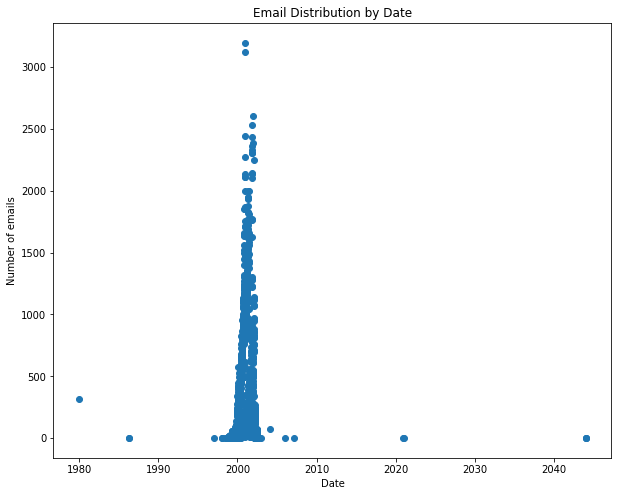

In [28]:
plt.figure(figsize=(10,8)) 
plt.scatter(x,y, label="Email Count")
plt.xlabel('Date') 
plt.ylabel("Number of emails") 
plt.title('Email Distribution by Date') 
plt.show()

This graph shows us a few things.  First, there are a few outlier dates that were likely imported incorrectly or transformed incorrectly.  Second, you can see when the fraud was occurring, the center of mass here is over 2003 which we know to be the time frame of interest.  Let's take the dates and look at them another way.  

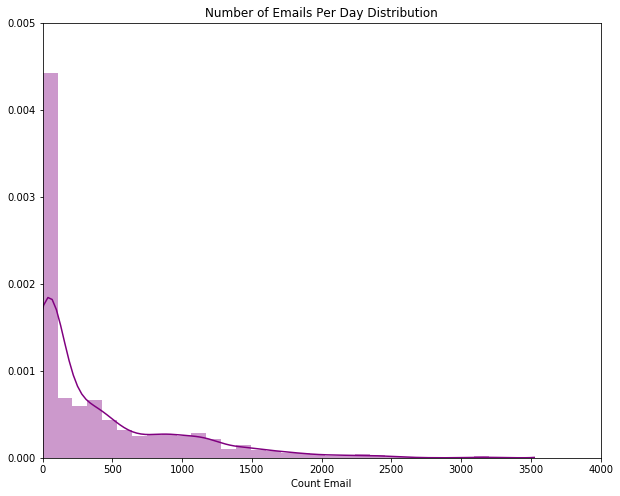

In [29]:
plt.figure(figsize=(10,8))
sns.distplot(y,hist=True, color = 'purple').set(xlim=(0,4000),ylim=(0,0.005))
plt.xlabel("Count Email")
plt.title("Number of Emails Per Day Distribution")
plt.show()

At first glance, this visual tells an unclear story.   I think this  is a nice visualization;  most days had a few emails (well under 500) but there is at least one day where there were over 3000 emails. 

Note that we truncated at 0 because there is no way to have a negative number of sent emails.

Now that we have thouroughly massaged the sent dates on the emails,  we need to switch focus to the \"to:\" field.  Our goal here is to create a network map, and to make a map, we need nodes and direction (namely, from and to). 

Let's pull these out of the dataframe and look at them separately.

In [30]:
#creating a new dataframe
recipients = df.to_field
recipients.head()

0                                    jarnold@enron.com
1                                john.arnold@enron.com
2    icehelpdesk@intcx.com, internalmarketing@intcx...
3    anthony.gilmore@enron.com, colleen.koenig@enro...
4                               mike.grigsby@enron.com
Name: to_field, dtype: object

In [31]:
#separating the string of recipients into different columns in the dataframe
recipient_df = recipients.str.split(pat = ', ',expand = True)

In [32]:
#looking at all the recipients
recipient_df.head(3)

0                            1     2     3     4     5     \
0      jarnold@enron.com                         None  None  None  None  None   
1  john.arnold@enron.com                         None  None  None  None  None   
2  icehelpdesk@intcx.com  internalmarketing@intcx.com  None  None  None  None   

   6     7     8     9     ...  1019  1020  1021  1022  1023  1024  1025  \
0  None  None  None  None  ...  None  None  None  None  None  None  None   
1  None  None  None  None  ...  None  None  None  None  None  None  None   
2  None  None  None  None  ...  None  None  None  None  None  None  None   

   1026  1027  1028  
0  None  None  None  
1  None  None  None  
2  None  None  None  

[3 rows x 1029 columns]

In [33]:
recipient_df.shape

(495554, 1029)

These dimensions represent the possible edges in the network map and that is a lot of possible edges; somewhere between 1 million and 500 million.  We will cut it down to the first 3 recipients then we only have about 1.487 million edges.  We will combine that with senders to make a new dataframe for the network maps.

In [34]:
#separating the first 3 series
recipient = recipient_df.iloc[:,0:3]
recipient.head()

0                            1  \
0          jarnold@enron.com                         None   
1      john.arnold@enron.com                         None   
2      icehelpdesk@intcx.com  internalmarketing@intcx.com   
3  anthony.gilmore@enron.com     colleen.koenig@enron.com   
4     mike.grigsby@enron.com                         None   

                                2  
0                            None  
1                            None  
2                            None  
3  \n\tjennifer.stewart@enron.com  
4                            None

In [35]:
#renaming columns
recipient.rename(columns={0: "recipient_1", 1: "recipient_2",2:"recipient_3"}, inplace = True)

In [36]:
#cleaning up the text
recipient['recipient_3'] = recipient['recipient_3'].str.replace('\n\t','')
recipient['recipient_3'].head()

0                          None
1                          None
2                          None
3    jennifer.stewart@enron.com
4                          None
Name: recipient_3, dtype: object

In [37]:
recipient['recipient_2'] = recipient['recipient_2'].str.replace('\n\t','')
recipient['recipient_1'] = recipient['recipient_1'].str.replace('\n\t','')
recipient.head(10)

recipient_1                  recipient_2  \
0          jarnold@enron.com                         None   
1      john.arnold@enron.com                         None   
2      icehelpdesk@intcx.com  internalmarketing@intcx.com   
3  anthony.gilmore@enron.com     colleen.koenig@enron.com   
4     mike.grigsby@enron.com                         None   
5      john.arnold@enron.com                         None   
6       aimee.shek@enron.com       albino.lopez@enron.com   
7     alex.mcleish@enron.com   sarah.mulholland@enron.com   
8      john.arnold@enron.com         mike.maggi@enron.com   
9      soblander@carrfut.com                         None   

                  recipient_3  
0                        None  
1                        None  
2                        None  
3  jennifer.stewart@enron.com  
4                        None  
5                        None  
6   andrea.williams@enron.com  
7     chris.mahoney@enron.com  
8                        None  
9                        None


![result sigh](images/result%20sign.png)

That looks more readable and will serve as the base for the new dataframe.

In [38]:
#creating separte dataframes for merging
sender = df.from_field
dates = df.date
subject = df.subject
body = df.body

result = pd.concat([sender, recipient, dates, subject,body],axis=1, sort=False)


In [39]:
#reviewing the results
result.head()

from_field                recipient_1  \
0            msagel@home.com          jarnold@enron.com   
1    slafontaine@globalp.com      john.arnold@enron.com   
2    iceoperations@intcx.com      icehelpdesk@intcx.com   
3  jeff.youngflesh@enron.com  anthony.gilmore@enron.com   
4  caroline.abramo@enron.com     mike.grigsby@enron.com   

                   recipient_2                 recipient_3        date  \
0                         None                        None  2000-11-16   
1                         None                        None  2000-12-08   
2  internalmarketing@intcx.com                        None  2001-05-15   
3     colleen.koenig@enron.com  jennifer.stewart@enron.com  2000-11-27   
4                         None                        None  2000-12-12   

                                             subject  \
0                                             Status   
1                                 re:summer inverses   
2                      The WTI Bullet swap contracts   
3  Invitation: EBS/GSS Meeting w/Bristol Babcock ...   
4                                       Harvard Mgmt   

                                                body  
0  John:\n?\nI'm not really sure what happened be...  
1  i suck-hope youve made more money in natgas la...  
2   Hi,\n\n\n  Following the e-mail you have rece...  
3  Conference Room TBD.  \n\nThis meeting will be...  
4  Mike- I have their trader coming into the offi...

Now that we have the results dataframe we can use it to create some visualizations using networkx, a python library that allows us to review complex networks and nxviz, a visualization packge for networkx.

We will look at three plots here: 

&emsp; __Arc Plot__ - Visualization where by nodes that represent entities are linked by their relationships along a single axis.

&emsp; __Circos Plot__ - Visualization in which nodes are ordered around the circumference of a circle and the edges are drawn within the circle, giving a clear, unclustered view of the network.

&emsp; __Network Map__ - Visualization that positions each node using Fruchterman-Reingold force-directed algorithm.

<Figure size 720x1080 with 0 Axes>

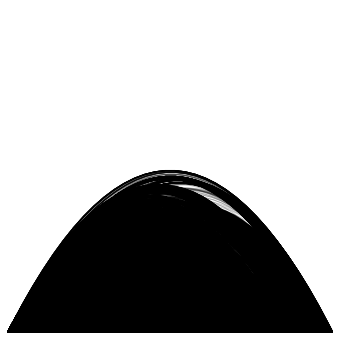

In [40]:
#creating the graph object
G = nx.from_pandas_edgelist(result, source ='from_field', target ='recipient_1', 
                            edge_attr=['subject', 'date'])
# plotting an arcplot
plt.figure(figsize=(10,15))
plot = nv.ArcPlot(G)
plot.draw()
plt.show()

<Figure size 720x1080 with 0 Axes>

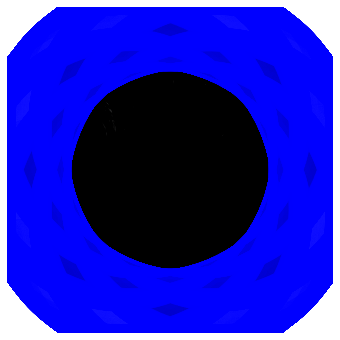

In [41]:
#plotting the Circos plot
plt.figure(figsize=(10,15))
plot = nv.CircosPlot(G)
plot.draw()
plt.show()

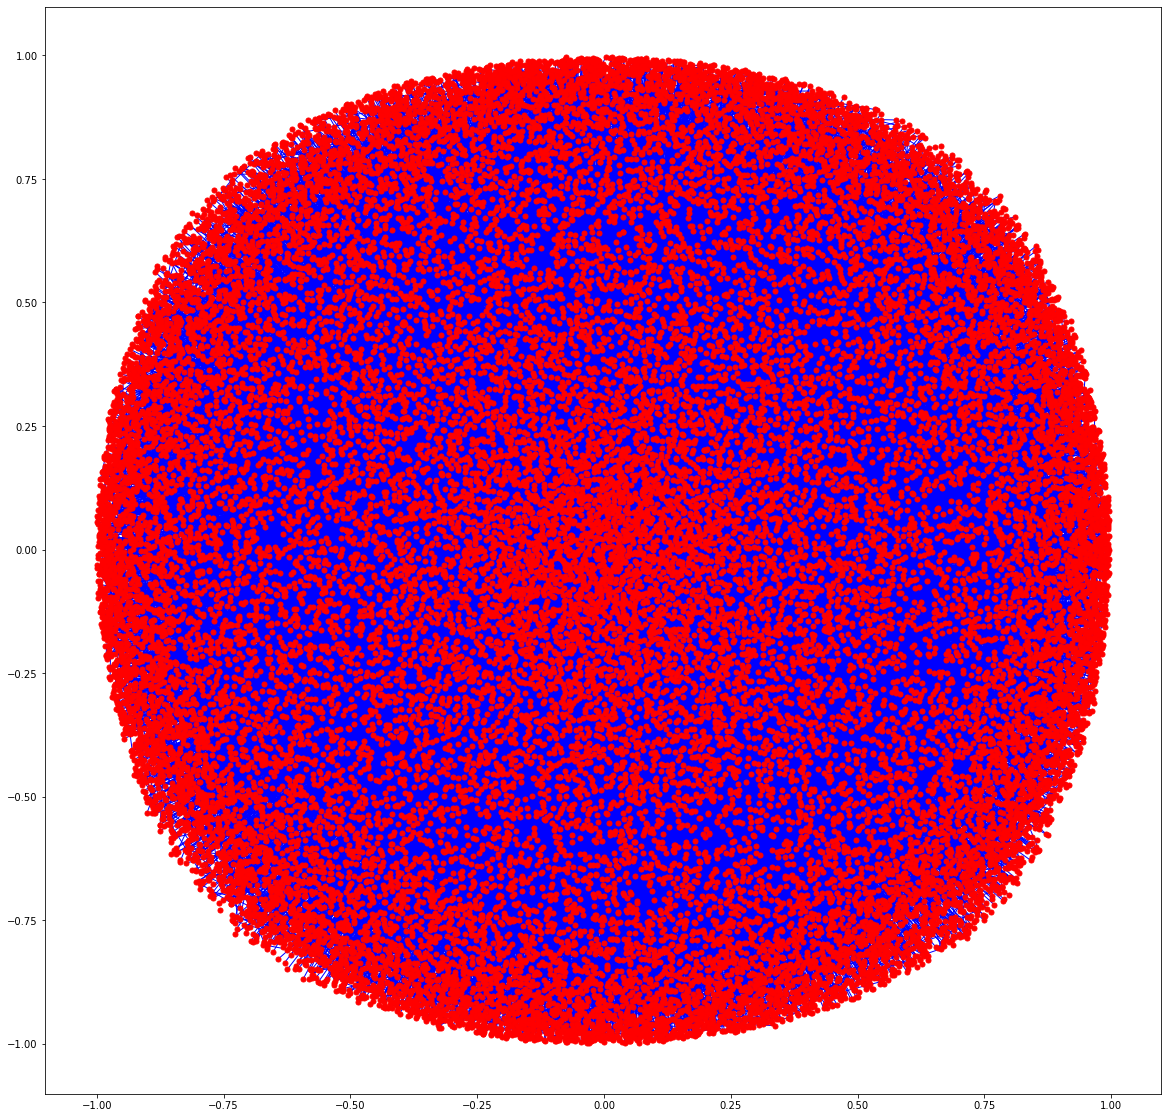

In [42]:
#drawing the network map
plt.figure(figsize=(20,20))
position = nx.spring_layout(G, k=.1)
nx.draw_networkx(G, position, node_size=25, node_color='red', with_labels=False, edge_color='blue')
plt.show()

These are great visualizations, however, taking a look at the full network is so big that it becomes too dense to really see on a regular screen and zooming in limits the view.  We can use the heaviest edges to draw a smaller collection of maps.

In [43]:
#viewing the nodes
G.nodes

NodeView(('msagel@home.com', 'jarnold@enron.com', 'slafontaine@globalp.com', 'john.arnold@enron.com', 'iceoperations@intcx.com', 'icehelpdesk@intcx.com', 'jeff.youngflesh@enron.com', 'anthony.gilmore@enron.com', 'caroline.abramo@enron.com', 'mike.grigsby@enron.com', 'klarnold@flash.net', 'outlook.team@enron.com', 'aimee.shek@enron.com', 'jennifer.fraser@enron.com', 'alex.mcleish@enron.com', 'soblander@carrfut.com', 'andy.zipper@enron.com', 'jean.mrha@enron.com', 'alan_batt@oxy.com', 'amy.gambill@enron.com', 'christie.patrick@enron.com', 'margaret.allen@enron.com', 'per.sekse@enron.com', 'brian.m.corbman@bofasecurities.com', 'michael.gapinski@ubspainewebber.com', 'laura.luce@enron.com', 'andrew.fairley@enron.com', 'jenwhite7@zdnetonebox.com', 'hrobertson@hbk.com', 'scrimale.bob@bcg.com', 'steve.lafontaine@bankofamerica.com', 'frank.hayden@enron.com', 'ina.rangel@enron.com', 'george.ellis@americas.bnpparibas.com', 'jpesot@gaoptions.com', 'info@amazon.com', 'kristin.gandy@enron.com', 'and

In [44]:
#viewing the edges
G.edges

EdgeView([('msagel@home.com', 'jarnold@enron.com'), ('msagel@home.com', 'john.arnold@enron.com'), ('msagel@home.com', 'mike.maggi@enron.com'), ('msagel@home.com', 'mmaggi@enron.com'), ('jarnold@enron.com', 'jpesot@gaoptions.com'), ('jarnold@enron.com', 'info@amazon.com'), ('jarnold@enron.com', 'kristin.gandy@enron.com'), ('jarnold@enron.com', 'mariamarcelle@hotmail.com'), ('jarnold@enron.com', 'execed@wharton.upenn.edu'), ('jarnold@enron.com', 'dailyquote@smtp.quote.com'), ('jarnold@enron.com', 'gift@amazon.com'), ('jarnold@enron.com', 'messenger@directtrak.com'), ('jarnold@enron.com', 'stephen.piasio@ssmb.com'), ('jarnold@enron.com', 'knowledge@wharton.upenn.edu'), ('jarnold@enron.com', 'swl@winelibrary.com'), ('jarnold@enron.com', 'buy.com@enews.buy.com'), ('jarnold@enron.com', 'steve.lafontaine@bankofamerica.com'), ('jarnold@enron.com', 'edmundg@manfinancial.com'), ('jarnold@enron.com', 'enron_update@concureworkplace.com'), ('jarnold@enron.com', 'mrodriguez@nymex.com'), ('jarnold@en

These lists are enormous, so we'll sort them based on the weight and pick the top # NUMBER

In [45]:
top_edges = sorted(G.edges(data=True), key=lambda t: t[2].get('weight', 1))
top_edges = top_edges[:1000]

In [46]:
len(top_edges)

1000

In [47]:
#creating a new graph object using only the top edges
G2 = nx.from_edgelist(top_edges, create_using=G)


<Figure size 720x1080 with 0 Axes>

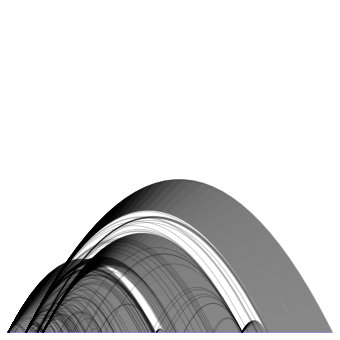

In [48]:
plt.figure(figsize=(10,15))
plot = nv.ArcPlot(G2)
plot.draw()
plt.show()

<Figure size 720x1080 with 0 Axes>

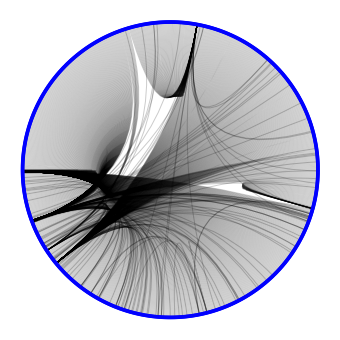

In [49]:
plt.figure(figsize=(10,15))
plot = nv.CircosPlot(G2)
plot.draw()
plt.show()

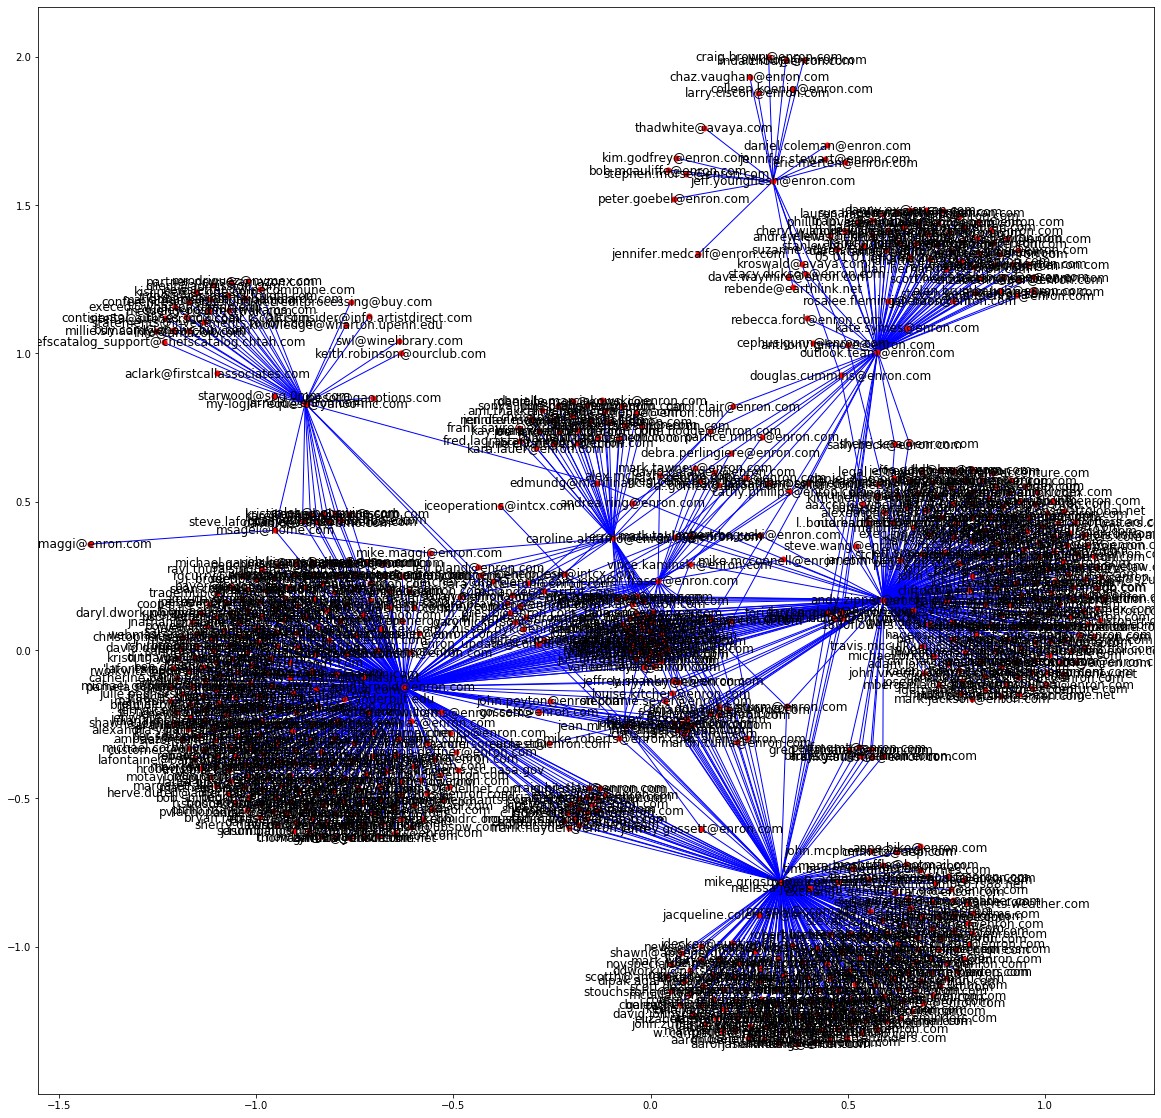

In [50]:
#networkmap with labels
plt.figure(figsize=(20,20))
position = nx.spring_layout(G2, k=.1, scale=2)
nx.draw_networkx(G2, position, node_size=25, node_color='red', with_labels=True, edge_color='blue')
plt.show()

Now that we have a sample from the whole data set we can more easily get a picture of the network.  Ler's look at the shape alone by removing the labels.

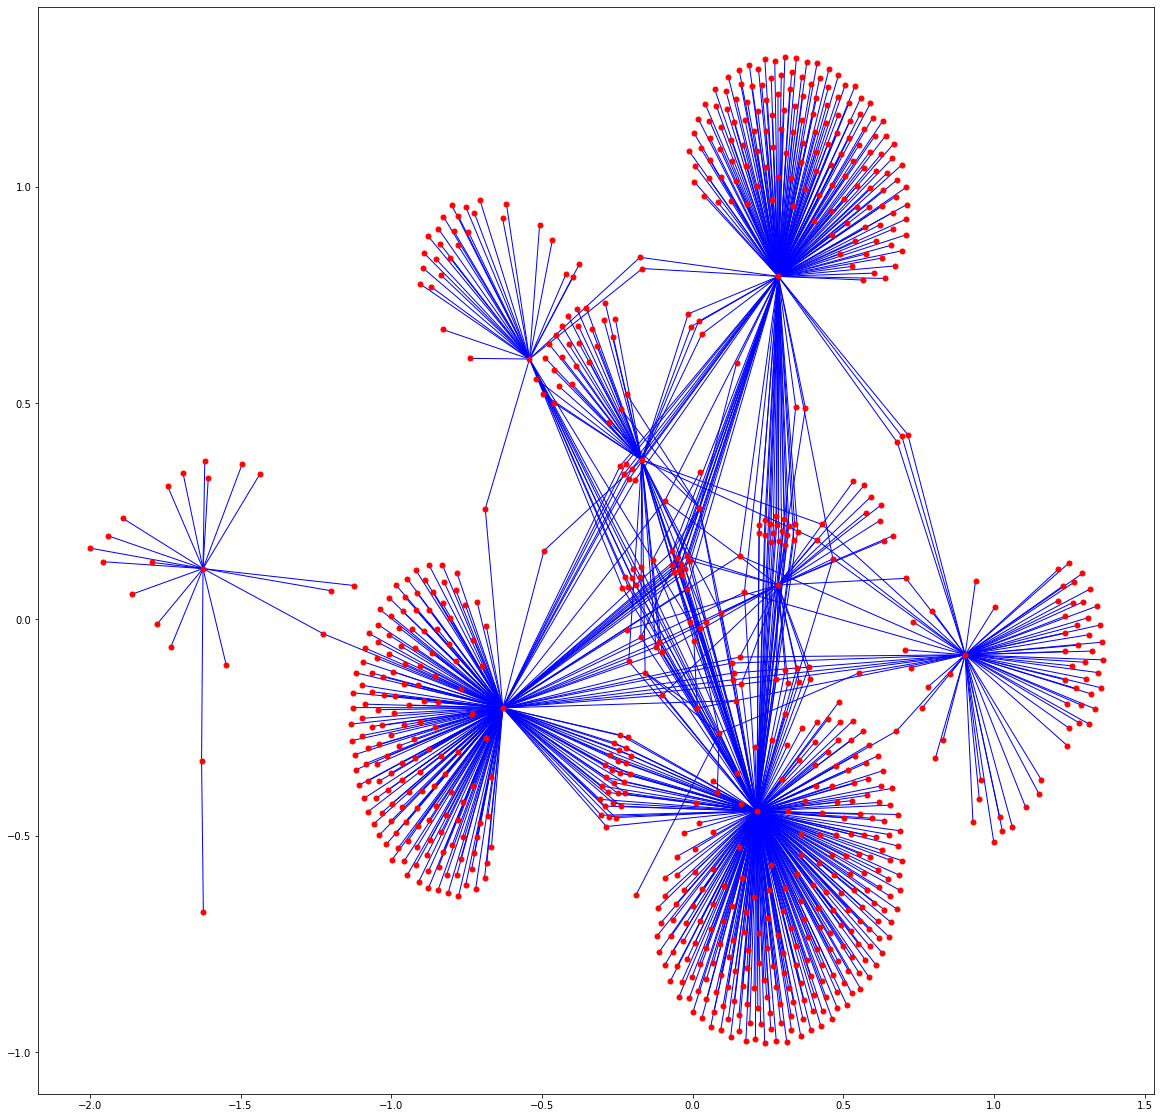

In [51]:
#removing hte labels
plt.figure(figsize=(20,20))
position = nx.spring_layout(G2, k=.1,scale=2)
nx.draw_networkx(G2, position, node_size=25, node_color='red', with_labels=False, edge_color='blue')
plt.show()

John Arnold is at the center (twice actually since he has multiple email addresses).  He was the head of natural gas trading and one of the most prominent traders at the company.  He was awarded one of the largest single bonuses in Enron history (some \$8mm) just days before Enron was forced to declare bankruptcy.

With such a busy map, it can be difficult to see the people at the center.  We can actually find that easily by calculating centrality.  In our case we will use degree centrality.

In [52]:
#calling the degree_centrality method on each graph object
central_nodes_G = nx.algorithms.centrality.degree_centrality(G)
central_nodes_G2 = nx.algorithms.centrality.degree_centrality(G2)

In [53]:
central_nodes_G2

{'msagel@home.com': 0.004860267314702308,
 'jarnold@enron.com': 0.04860267314702308,
 'john.arnold@enron.com': 0.41676792223572295,
 'mike.maggi@enron.com': 0.0036452004860267314,
 'mmaggi@enron.com': 0.001215066828675577,
 'jpesot@gaoptions.com': 0.001215066828675577,
 'info@amazon.com': 0.001215066828675577,
 'kristin.gandy@enron.com': 0.002430133657351154,
 'mariamarcelle@hotmail.com': 0.001215066828675577,
 'execed@wharton.upenn.edu': 0.001215066828675577,
 'dailyquote@smtp.quote.com': 0.002430133657351154,
 'gift@amazon.com': 0.002430133657351154,
 'messenger@directtrak.com': 0.001215066828675577,
 'stephen.piasio@ssmb.com': 0.002430133657351154,
 'knowledge@wharton.upenn.edu': 0.001215066828675577,
 'swl@winelibrary.com': 0.001215066828675577,
 'buy.com@enews.buy.com': 0.001215066828675577,
 'steve.lafontaine@bankofamerica.com': 0.002430133657351154,
 'edmundg@manfinancial.com': 0.002430133657351154,
 'enron_update@concureworkplace.com': 0.002430133657351154,
 'mrodriguez@nymex.c

The centrality is sorted as a dictionary in our variable, which means we can find the individual with the highest centrality by looping over the collection.

In [54]:
weight = 0
for key in central_nodes_G:
    val = central_nodes_G[key]
    if val > weight:
        weight = val
        top = key
print("{} is a top emailer with a weight of {}.".format(top, round(weight,9)))

john.arnold@enron.com is a top emailer with a weight of 0.416767922.


In [55]:
weight2 = 0
for key in central_nodes_G2:
    val = central_nodes_G2[key]
    if val > weight2:
        weight2 = val
        top = key
print("Top emailer, {}, has a with a centrality of {}.".format(top,round(weight2,9)))

Top emailer, john.arnold@enron.com, has a with a centrality of 0.416767922.


It's great that we were able to construct the network maps, but this won't tell us enough about the people at the company who may have been involved in the ongoing fraud.  We can get the top 50 most active senders and start to narrow down who may have been involved.

In [56]:
#top 50 by taking the set of the sender email counts
top_sender = (lambda x: set(x[:50].index))(result['from_field'].value_counts())
top_sender


{'arsystem@mailman.enron.com',
 'benjamin.rogers@enron.com',
 'carol.clair@enron.com',
 'chris.dorland@enron.com',
 'chris.germany@enron.com',
 'd..steffes@enron.com',
 'dan.hyvl@enron.com',
 'daren.farmer@enron.com',
 'darron.giron@enron.com',
 'david.delainey@enron.com',
 'debra.perlingiere@enron.com',
 'drew.fossum@enron.com',
 'elizabeth.sager@enron.com',
 'enron.announcements@enron.com',
 'eric.bass@enron.com',
 'errol.mclaughlin@enron.com',
 'gerald.nemec@enron.com',
 'j.kaminski@enron.com',
 'james.steffes@enron.com',
 'jeff.dasovich@enron.com',
 'jeffrey.shankman@enron.com',
 'john.arnold@enron.com',
 'john.lavorato@enron.com',
 'kate.symes@enron.com',
 'kay.mann@enron.com',
 'kimberly.watson@enron.com',
 'larry.campbell@enron.com',
 'louise.kitchen@enron.com',
 'lynn.blair@enron.com',
 'mark.haedicke@enron.com',
 'mark.taylor@enron.com',
 'mary.hain@enron.com',
 'matthew.lenhart@enron.com',
 'michelle.cash@enron.com',
 'mike.grigsby@enron.com',
 'mike.mcconnell@enron.com',
 'p

Given that there are multiple recipient columns, the collection of the top receivers is a little more complicated, but it follows the same principle.

In [57]:
top_recipient1 = (lambda x: set(x[:30].index))(result['recipient_1'].value_counts())
top_recipient1 = list(top_recipient1)
top_recipient1

['susan.bailey@enron.com',
 'jeff.dasovich@enron.com',
 'gerald.nemec@enron.com',
 'pete.davis@enron.com',
 'tana.jones@enron.com',
 'tim.belden@enron.com',
 'james.steffes@enron.com',
 'john.lavorato@enron.com',
 'suzanne.adams@enron.com',
 'klay@enron.com',
 'sara.shackleton@enron.com',
 'shirley.crenshaw@enron.com',
 'all.houston@enron.com',
 'chris.germany@enron.com',
 'richard.shapiro@enron.com',
 'mark.taylor@enron.com',
 'jeff.skilling@enron.com',
 'sally.beck@enron.com',
 'alan.comnes@enron.com',
 'benjamin.rogers@enron.com',
 'alan.aronowitz@enron.com',
 'kenneth.lay@enron.com',
 'vince.kaminski@enron.com',
 'kate.symes@enron.com',
 'kay.mann@enron.com',
 'steven.kean@enron.com',
 'vkaminski@aol.com',
 'all.worldwide@enron.com',
 'louise.kitchen@enron.com',
 'daren.farmer@enron.com']

In [58]:
top_recipient2 = (lambda x: set(x[:30].index))(result['recipient_2'].value_counts())
top_recipient2= list(top_recipient2)
top_recipient2

['susan.bailey@enron.com',
 'jeff.dasovich@enron.com',
 'd..steffes@enron.com',
 'cliff.baxter@enron.com',
 'tana.jones@enron.com',
 'james.steffes@enron.com',
 'tim.belden@enron.com',
 'john.arnold@enron.com',
 'greg.whalley@enron.com',
 'john.lavorato@enron.com',
 'sara.shackleton@enron.com',
 'chris.germany@enron.com',
 'jeffrey.hodge@enron.com',
 'richard.shapiro@enron.com',
 'samantha.boyd@enron.com',
 'jeff.skilling@enron.com',
 'mark.taylor@enron.com',
 'sally.beck@enron.com',
 'angela.schwarz@enron.com',
 'ggreen2@txu.com',
 'mday@gmssr.com',
 'robert.badeer@enron.com',
 'mary.cook@enron.com',
 'susan.mara@enron.com',
 'kay.mann@enron.com',
 'steven.kean@enron.com',
 'louise.kitchen@enron.com',
 'daren.farmer@enron.com',
 'f..brawner@enron.com',
 'william.bradford@enron.com']

In [59]:
top_recipient3 = (lambda x: set(x[:30].index))(result['recipient_3'].value_counts())
top_recipient3 = list(top_recipient3)
top_recipient3

['susan.bailey@enron.com',
 'jeff.dasovich@enron.com',
 'daren.j.farmer@enron.com',
 'linda.robertson@enron.com',
 'tana.jones@enron.com',
 'james.steffes@enron.com',
 'tim.belden@enron.com',
 'genia.fitzgerald@enron.com',
 'cliff.baxter@enron.com',
 'sara.shackleton@enron.com',
 'andrew.conner@enron.com',
 'brent.hendry@enron.com',
 'chris.germany@enron.com',
 'richard.shapiro@enron.com',
 'samantha.boyd@enron.com',
 'mark.palmer@enron.com',
 'mark.taylor@enron.com',
 'lorraine.lindberg@enron.com',
 'peggy.banczak@enron.com',
 'beverly.aden@enron.com',
 'paul.kaufman@enron.com',
 'stacy.dickson@enron.com',
 'cstone1@txu.com',
 'mary.cook@enron.com',
 'susan.mara@enron.com',
 'bhansen@lhom.com',
 'sandra.mccubbin@enron.com',
 'steven.kean@enron.com',
 'louise.kitchen@enron.com',
 'anubhav.aggarwal@enron.com']

In [60]:
top_recipients = (top_recipient1+ top_recipient2 + top_recipient3)
top_recipients

['susan.bailey@enron.com',
 'jeff.dasovich@enron.com',
 'gerald.nemec@enron.com',
 'pete.davis@enron.com',
 'tana.jones@enron.com',
 'tim.belden@enron.com',
 'james.steffes@enron.com',
 'john.lavorato@enron.com',
 'suzanne.adams@enron.com',
 'klay@enron.com',
 'sara.shackleton@enron.com',
 'shirley.crenshaw@enron.com',
 'all.houston@enron.com',
 'chris.germany@enron.com',
 'richard.shapiro@enron.com',
 'mark.taylor@enron.com',
 'jeff.skilling@enron.com',
 'sally.beck@enron.com',
 'alan.comnes@enron.com',
 'benjamin.rogers@enron.com',
 'alan.aronowitz@enron.com',
 'kenneth.lay@enron.com',
 'vince.kaminski@enron.com',
 'kate.symes@enron.com',
 'kay.mann@enron.com',
 'steven.kean@enron.com',
 'vkaminski@aol.com',
 'all.worldwide@enron.com',
 'louise.kitchen@enron.com',
 'daren.farmer@enron.com',
 'susan.bailey@enron.com',
 'jeff.dasovich@enron.com',
 'd..steffes@enron.com',
 'cliff.baxter@enron.com',
 'tana.jones@enron.com',
 'james.steffes@enron.com',
 'tim.belden@enron.com',
 'john.arno

In [61]:
top_recipient = set(top_recipients)
top_recipient = list(top_recipient)
print(top_recipient, "\n\n\nThere are {} top recipients from three reciever series.".format(len(top_recipient)))

['susan.bailey@enron.com', 'jeff.dasovich@enron.com', 'gerald.nemec@enron.com', 'pete.davis@enron.com', 'daren.j.farmer@enron.com', 'd..steffes@enron.com', 'cliff.baxter@enron.com', 'tana.jones@enron.com', 'tim.belden@enron.com', 'james.steffes@enron.com', 'linda.robertson@enron.com', 'john.arnold@enron.com', 'genia.fitzgerald@enron.com', 'john.lavorato@enron.com', 'greg.whalley@enron.com', 'suzanne.adams@enron.com', 'klay@enron.com', 'sara.shackleton@enron.com', 'anubhav.aggarwal@enron.com', 'shirley.crenshaw@enron.com', 'all.houston@enron.com', 'andrew.conner@enron.com', 'brent.hendry@enron.com', 'chris.germany@enron.com', 'jeffrey.hodge@enron.com', 'richard.shapiro@enron.com', 'samantha.boyd@enron.com', 'mark.palmer@enron.com', 'mark.taylor@enron.com', 'jeff.skilling@enron.com', 'lorraine.lindberg@enron.com', 'sally.beck@enron.com', 'alan.comnes@enron.com', 'angela.schwarz@enron.com', 'peggy.banczak@enron.com', 'benjamin.rogers@enron.com', 'alan.aronowitz@enron.com', 'beverly.aden@e

We have completed the first section of our analysis: obtaining, cleaning, and some exploring.  We'll store some of the variables that we made so we can use them in other notebooks in the same folder.  

In [62]:
%store top_sender
%store top_recipient
%store result
%store df

Stored 'top_sender' (set)
Stored 'top_recipient' (list)
Stored 'result' (DataFrame)
Stored 'df' (DataFrame)


In [83]:
#saving the result df to a csv
result.to_csv(r'./result.csv', index=False)

### If you'd like to continue please move on to notebook, part 2.